In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Read CSV
df = pd.read_csv('clean.csv')

# What percentage of jobs are remote, hybrid, or on-site?

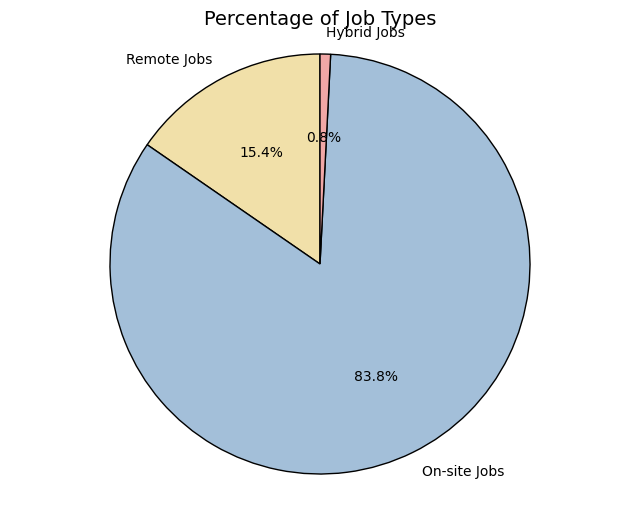

In [13]:
#Calculate percentages of job types
remote_jobs = df['remote_allowed'].value_counts(normalize=True) * 100
remote_percentage = remote_jobs.get(1, 0)  # Remote jobs
onsite_percentage = remote_jobs.get(0, 0)  # On-site jobs

# Used the title column to identify hybrid jobs
hybrid_jobs = df['title'].str.contains('hybrid', case=False, na=False).sum()
total_jobs = len(df)
hybrid_percentage = (hybrid_jobs / total_jobs) * 100

# Adjust percentage
onsite_percentage -= hybrid_percentage

# --- Visualization for Job Type Distribution ---
labels = ['Remote Jobs', 'On-site Jobs', 'Hybrid Jobs']
sizes = [remote_percentage, onsite_percentage, hybrid_percentage]
colors = ['#F1E0A9', '#A3BFD9', '#F1A7A6']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Job Types', fontsize=14)
plt.axis('equal')
plt.show()


# How are job opportunities distributed across different states/cities?

<Figure size 1000x600 with 0 Axes>

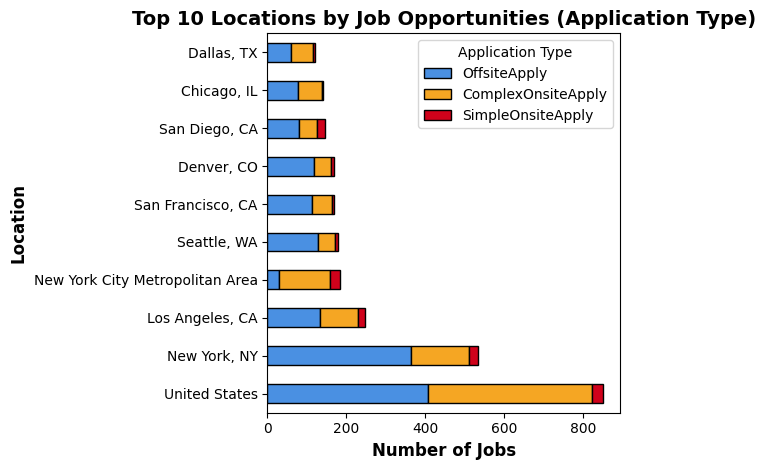

In [14]:
location_application_grouped = df.groupby(['location', 'application_type']).agg({
    'job_id': 'count'
}).reset_index()

location_application_grouped.columns = ['Location', 'Application Type', 'Number of Jobs']
location_application_pivot = location_application_grouped.pivot_table(index='Location', columns='Application Type', values='Number of Jobs', aggfunc='sum').fillna(0)
location_application_pivot['Total Jobs'] = location_application_pivot.sum(axis=1)
location_application_pivot = location_application_pivot.sort_values('Total Jobs', ascending=False)
top_location_application = location_application_pivot.head(10)
top_location_application_int = top_location_application[['OffsiteApply', 'ComplexOnsiteApply', 'SimpleOnsiteApply', 'Total Jobs']].astype(int)

# --- Visualization for Job Opportunities by Application Type ---
plt.figure(figsize=(10, 6))

top_location_application[['OffsiteApply', 'ComplexOnsiteApply', 'SimpleOnsiteApply']].plot.barh(stacked=True, color=['#4A90E2', '#F5A623', '#D0021B'], edgecolor='black')

plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')
plt.title('Top 10 Locations by Job Opportunities (Application Type)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
